In [1]:
import tensorflow as tf
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_dir = "/content/drive/MyDrive/Final_Project/images"

In [6]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2,
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 8974 images belonging to 17 classes.
Found 2238 images belonging to 17 classes.


In [7]:
print(train_generator.class_indices)
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
labels
with open('labels.txt', 'w') as f:
  f.write(labels)

{'Airsoft': 0, 'Beach volleyball': 1, 'Cycle polo': 2, 'Flag football': 3, 'Karate': 4, 'Motocross': 5, 'Muay Thai': 6, 'Nordic skiing': 7, 'Olympic weightlifting': 8, 'Parachuting': 9, 'Rallycross': 10, 'Roller hockey': 11, 'Rugby union': 12, 'Sprint car racing': 13, 'Table tennis': 14, 'Wakeboarding': 15, 'no sport': 16}


In [8]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

In [9]:
model = tf.keras.Sequential([
                           tf.keras.layers.Conv2D(64, 3, activation='relu', input_shape=IMG_SHAPE), 
                           tf.keras.layers.Conv2D(32, 3, activation='relu'), 
                           tf.keras.layers.Conv2D(32, 3, activation='relu'), 
                           tf.keras.layers.MaxPooling2D(3),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Conv2D(64, 3, activation='relu'), 
                           tf.keras.layers.Conv2D(64, 3, activation='relu'),
                           tf.keras.layers.MaxPooling2D(3),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(64),
                           tf.keras.layers.Dense(32),
                           tf.keras.layers.Dense(17, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 72, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 72, 72, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 70, 70, 64)        18496     
                                                        

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [11]:
epochs = 5

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data=val_generator)

Epoch 1/5
141/141 [==============================] - 2005s 14s/step - loss: 2.3337 - accuracy: 0.2625 - val_loss: 2.0343 - val_accuracy: 0.3633
Epoch 2/5
141/141 [==============================] - 228s 2s/step - loss: 1.7502 - accuracy: 0.4598 - val_loss: 1.5763 - val_accuracy: 0.5098
Epoch 3/5
141/141 [==============================] - 229s 2s/step - loss: 1.4827 - accuracy: 0.5441 - val_loss: 1.4087 - val_accuracy: 0.5809
Epoch 4/5
141/141 [==============================] - 231s 2s/step - loss: 1.3065 - accuracy: 0.6016 - val_loss: 1.2905 - val_accuracy: 0.6059
Epoch 5/5
141/141 [==============================] - 232s 2s/step - loss: 1.1988 - accuracy: 0.6339 - val_loss: 1.1913 - val_accuracy: 0.6287


In [12]:
# Measure accuracy and loss after training

final_loss, final_accuracy = model.evaluate(val_generator)

35/35 [==============================] - 43s 1s/step - loss: 1.2165 - accuracy: 0.6282


In [13]:
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

Final loss: 1.22
Final accuracy: 62.82%


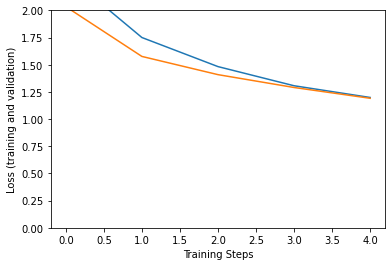

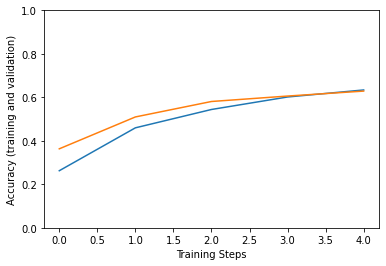

In [14]:
import matplotlib.pylab as plt

# Visualize training process

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [15]:
import numpy as np

# Get images and labels batch from validation dataset generator
# Validation batch shape tells us that we have a batch of 32 images, with size and channels: 224x224x3.

val_image_batch, val_label_batch = next(iter(val_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (64, 224, 224, 3)


In [16]:
#calculate predictions for the entire batch.

tf_model_predictions = model(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (64, 17)


In [17]:
import pandas as pd

In [18]:
dataset_labels = sorted(train_generator.class_indices.keys())

In [19]:
# Convert prediction results to Pandas dataframe, for better visualization

tf_pred_dataframe = pd.DataFrame(tf_model_predictions.numpy())
tf_pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,Airsoft,Beach volleyball,Cycle polo,Flag football,Karate,Motocross,Muay Thai,Nordic skiing,Olympic weightlifting,Parachuting,Rallycross,Roller hockey,Rugby union,Sprint car racing,Table tennis,Wakeboarding,no sport
0,0.000962,0.267070,0.004834,0.000124,0.005061,0.000613,0.522201,0.000531,0.077267,0.001698,0.000012,0.041584,0.002941,0.000386,0.006691,0.000384,0.067641
1,0.071951,0.003965,0.014710,0.162141,0.018549,0.009904,0.004041,0.000044,0.000207,0.087378,0.057754,0.000176,0.092866,0.057352,0.020564,0.002596,0.395802
2,0.013419,0.007787,0.557447,0.001078,0.014777,0.043982,0.004393,0.016605,0.000554,0.021264,0.028361,0.005881,0.000975,0.016146,0.005826,0.163688,0.097818
3,0.000769,0.000615,0.003662,0.000122,0.032981,0.000033,0.025479,0.000317,0.830386,0.001665,0.000084,0.010851,0.000204,0.000837,0.056016,0.000412,0.035566
4,0.008271,0.000978,0.005028,0.753923,0.001347,0.014832,0.000466,0.000010,0.000007,0.051436,0.018521,0.000754,0.122080,0.001486,0.001691,0.000463,0.018708


In [20]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = predicted_ids

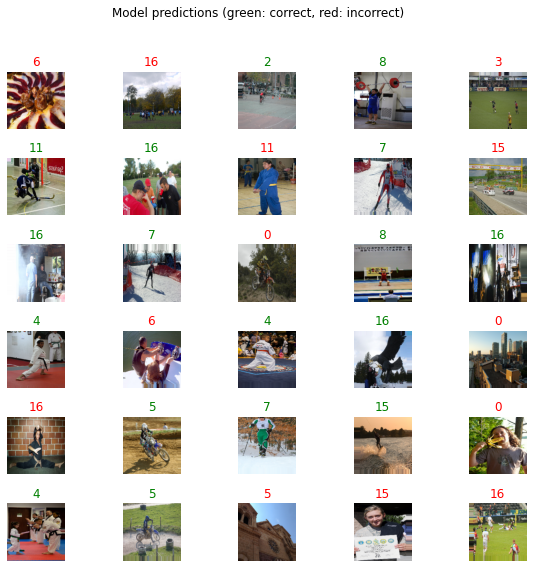

In [21]:
# Print images batch and labels predictions

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n], color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [22]:
from tensorflow import keras
from tensorflow.keras import layers, models

In [23]:
pip install visualkeras

     |████████████████████████████████| 992 kB 5.1 MB/s 


In [24]:
import visualkeras

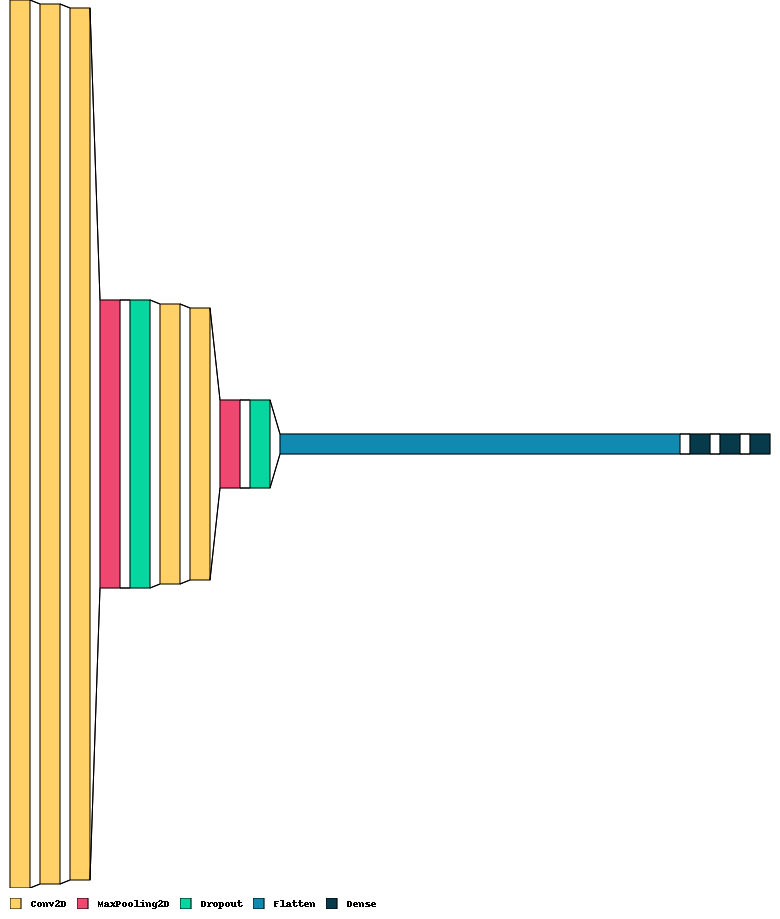

In [25]:
visualkeras.layered_view(model, legend=True, draw_volume=False) 

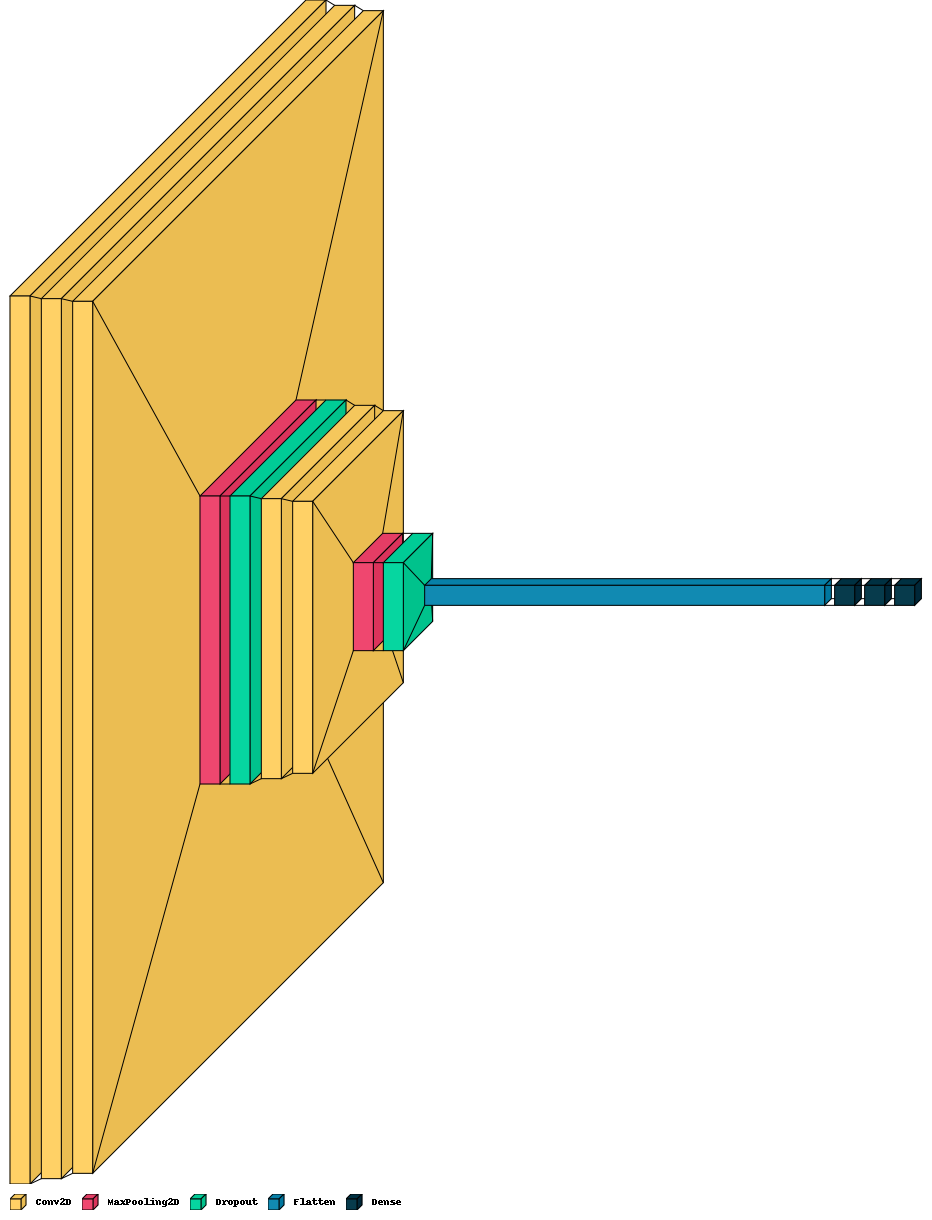

In [26]:
visualkeras.layered_view(model, legend=True)

In [27]:
saved_model_dir = ''
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: assets
INFO:tensorflow:Assets written to: /tmp/tmp8r5r1gh2/assets


In [28]:
from google.colab import files
files.download('model.tflite')
files.download('labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>